### **References**

- [https://www.datacamp.com/tutorial/decision-tree-classification-python](https://www.datacamp.com/tutorial/decision-tree-classification-python)
- [https://www.w3schools.com/python/python_ml_decision_tree.asp](https://www.w3schools.com/python/python_ml_decision_tree.asp)
- [https://scikit-learn.org/stable/modules/tree.html](https://scikit-learn.org/stable/modules/tree.html)
- [https://trituenhantao.io/kien-thuc/decision-tree/](https://trituenhantao.io/kien-thuc/decision-tree/)
- [https://machinelearningcoban.com/tabml_book/ch_model/decision_tree.html](https://machinelearningcoban.com/tabml_book/ch_model/decision_tree.html)
- [https://viblo.asia/p/cay-quyet-dinh-decision-tree-RnB5pXWJ5PG](https://viblo.asia/p/cay-quyet-dinh-decision-tree-RnB5pXWJ5PG)

### **Example**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
ex_data = pd.DataFrame({'loves_popcorn': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
                        'loves_soda': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
                        'age': [7, 12, 18, 35, 38, 50, 83],
                        'loves_cool_as_ice': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']})
print(ex_data)

  loves_popcorn loves_soda  age loves_cool_as_ice
0           Yes        Yes    7                No
1           Yes         No   12                No
2            No        Yes   18               Yes
3            No        Yes   35               Yes
4           Yes        Yes   38               Yes
5           Yes         No   50                No
6            No         No   83                No


Predict ppl who loves cool as ice

Gini index: $$Gini=\sum\left(p_{i}\right)^2$$
Calculate Gini index:

In [16]:
# popcorn node
print('loves_popcorn:')
loves_popcorn = ex_data[ex_data['loves_popcorn'] == 'Yes']
print(loves_popcorn)

lp__loves_ice__count = len(loves_popcorn[loves_popcorn['loves_cool_as_ice'] == 'Yes'])
lp__not_loves_ice__count = len(loves_popcorn[loves_popcorn['loves_cool_as_ice'] == 'No'])

lp__gini = 1 - (lp__loves_ice__count/len(loves_popcorn))**2 - (lp__not_loves_ice__count/len(loves_popcorn))**2
print('lp__gini:', lp__gini)

print('--' * 15)

print('not_loves_popcorn:')
not_loves_popcorn = ex_data[ex_data['loves_popcorn'] == 'No']
print(not_loves_popcorn)

nlp__loves_ice__count = len(not_loves_popcorn[not_loves_popcorn['loves_cool_as_ice'] == 'Yes'])
nlp__not_loves_ice__count = len(not_loves_popcorn[not_loves_popcorn['loves_cool_as_ice'] == 'No'])

nlp__gini = 1 - (nlp__loves_ice__count/len(not_loves_popcorn))**2 - (nlp__not_loves_ice__count/len(not_loves_popcorn))**2
print('nlp__gini:', nlp__gini)

print('--' * 15)

popcorn_node_gini = (len(loves_popcorn)/len(ex_data))*lp__gini + (len(not_loves_popcorn)/len(ex_data))*nlp__gini
print('popcorn_node_gini:', popcorn_node_gini) 

loves_popcorn:
  loves_popcorn loves_soda  age loves_cool_as_ice
0           Yes        Yes    7                No
1           Yes         No   12                No
4           Yes        Yes   38               Yes
5           Yes         No   50                No
lp__gini: 0.375
------------------------------
not_loves_popcorn:
  loves_popcorn loves_soda  age loves_cool_as_ice
2            No        Yes   18               Yes
3            No        Yes   35               Yes
6            No         No   83                No
nlp__gini: 0.4444444444444445
------------------------------
popcorn_node_gini: 0.40476190476190477


Example loves_popcorn:
```mermaid
flowchart TD
    A[Popcorn] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B -->|Yes| D[1]
    B --> |No| E[3]
    C --> |Yes| F[2]
    C --> |No| G[1]
```

lp__gini: $$Gini=1-\left(\frac{1}{1+3}\right)^2-\left(\frac{3}{1+3}\right)^2=0.375$$
nlp__gini: $$Gini=1-\left(\frac{2}{2+1}\right)^2-\left(\frac{1}{2+1}\right)^2=0.404$$
popcorn_node_gini: $$Gini=\left(\frac{4}{4+3}\right)\cdot0.375+\left(\frac{3}{4+3}\right)\cdot0.404=0.405$$

In [17]:
# soda node
print('loves_soda:')
loves_soda = ex_data[ex_data['loves_soda'] == 'Yes']
print(loves_soda)

ls__loves_ice__count = len(loves_soda[loves_soda['loves_cool_as_ice'] == 'Yes'])
ls__not_loves_ice__count = len(loves_soda[loves_soda['loves_cool_as_ice'] == 'No'])

ls__gini = 1 - (ls__loves_ice__count/len(loves_soda))**2 - (ls__not_loves_ice__count/len(loves_soda))**2
print('ls__gini:', ls__gini)

print('--' * 15)

print('not_loves_soda:')
not_loves_soda = ex_data[ex_data['loves_soda'] == 'No']
print(not_loves_soda)

nls__loves_ice__count = len(not_loves_soda[not_loves_soda['loves_cool_as_ice'] == 'Yes'])
nls__not_loves_ice__count = len(not_loves_soda[not_loves_soda['loves_cool_as_ice'] == 'No'])

nls__gini = 1 - (nls__loves_ice__count/len(not_loves_soda))**2 - (nls__not_loves_ice__count/len(not_loves_soda))**2
print('nls__gini:', nls__gini)

print('--' * 15)

soda_node_gini = (len(loves_soda)/len(ex_data))*ls__gini + (len(not_loves_soda)/len(ex_data))*nls__gini
print('soda_node_gini:', soda_node_gini) 

loves_soda:
  loves_popcorn loves_soda  age loves_cool_as_ice
0           Yes        Yes    7                No
2            No        Yes   18               Yes
3            No        Yes   35               Yes
4           Yes        Yes   38               Yes
ls__gini: 0.375
------------------------------
not_loves_soda:
  loves_popcorn loves_soda  age loves_cool_as_ice
1           Yes         No   12                No
5           Yes         No   50                No
6            No         No   83                No
nls__gini: 0.0
------------------------------
soda_node_gini: 0.21428571428571427


Example loves_soda:
```mermaid
flowchart TD
    A[Soda] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B -->|Yes| D[3]
    B --> |No| E[1]
    C --> |Yes| F[0]
    C --> |No| G[3]
```

ls__gini: $$Gini=1-\left(\frac{3}{3+1}\right)^2-\left(\frac{1}{3+1}\right)^2=0.375$$
nls__gini: $$Gini=1-\left(\frac{0}{0+3}\right)^2-\left(\frac{3}{0+3}\right)^2=0.0$$
soda_node_gini: $$Gini=\left(\frac{4}{4+3}\right)\cdot0.375+\left(\frac{3}{4+3}\right)\cdot0.0=0.214$$

In [18]:
# age node
print('age:') 
print(ex_data[['age', 'loves_cool_as_ice']])

age:
   age loves_cool_as_ice
0    7                No
1   12                No
2   18               Yes
3   35               Yes
4   38               Yes
5   50                No
6   83                No


Calculate age ranges

In [19]:
age_ranges = pd.DataFrame({ 'mean_age': [], 'gini': [] })
for index, row in ex_data.iterrows():
    if (index != 0 & index < (len(ex_data) - 1)):
        age_ranges.loc[len(age_ranges)] = [np.mean([row['age'], ex_data.loc[index - 1]['age']]), 0]
print(age_ranges)

   mean_age  gini
0       9.5   0.0
1      15.0   0.0
2      26.5   0.0
3      36.5   0.0
4      44.0   0.0
5      66.5   0.0


In [20]:
for index, row in age_ranges.iterrows():
    a = ex_data[ex_data['age'] < row['mean_age']]

    a__loves_ice__count = len(a[a['loves_cool_as_ice'] == 'Yes'])
    a__not_loves_ice__count = len(a[a['loves_cool_as_ice'] == 'No'])

    a_gini = 1 - (a__loves_ice__count/len(a))**2 - (a__not_loves_ice__count/len(a))**2

    #######################################

    na = ex_data[ex_data['age'] >= row['mean_age']]

    na__loves_ice__count = len(na[na['loves_cool_as_ice'] == 'Yes'])
    na__not_loves_ice__count = len(na[na['loves_cool_as_ice'] == 'No'])

    na_gini = 1 - (na__loves_ice__count/len(na))**2 - (na__not_loves_ice__count/len(na))**2

    #######################################

    a_node_gini = (len(a)/len(ex_data))*a_gini + (len(na)/len(ex_data))*na_gini
    row['gini'] = a_node_gini

print(age_ranges)
print('min gini:', age_ranges['gini'].min())

   mean_age      gini
0       9.5  0.428571
1      15.0  0.342857
2      26.5  0.476190
3      36.5  0.476190
4      44.0  0.342857
5      66.5  0.428571
min gini: 0.34285714285714286


Example age < 9.5:
```mermaid
flowchart TD
    A[Age < 9.5] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B -->|Yes| D[0]
    B --> |No| E[1]
    C --> |Yes| F[3]
    C --> |No| G[3]
```

a95__gini: $$Gini=1-\left(\frac{0}{0+1}\right)^2-\left(\frac{1}{0+1}\right)^2=0.0$$
na95__gini: $$Gini=1-\left(\frac{3}{3+3}\right)^2-\left(\frac{3}{3+3}\right)^2=0.5$$
soda_node_gini: $$Gini=\left(\frac{1}{1+6}\right)\cdot0.0+\left(\frac{6}{1+6}\right)\cdot0.5=0.429$$

Compare gini:
- popcorn: 0.404
- soda: 0.214
- age: 0.342 
 
==> select min gini as root node: soda

```mermaid
flowchart TD
    A[Soda] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B -->|Yes| D[3]
    B --> |No| E[1]
    C --> |Yes| F[0]
    C --> |No| G[3]
    D --> H[Popcorn or Age?]
    E --> H
```

==> False branch was fit (cuz gini = 0)  
Need to decide next node is popcorn or age

In [21]:
new_ex_data = ex_data[ex_data['loves_soda'] == 'Yes']
new_ex_data.reset_index(drop=True, inplace=True)
print(new_ex_data)

  loves_popcorn loves_soda  age loves_cool_as_ice
0           Yes        Yes    7                No
1            No        Yes   18               Yes
2            No        Yes   35               Yes
3           Yes        Yes   38               Yes


Calculate popcorn gini:

In [22]:
# popcorn node
print('loves_popcorn:')
loves_popcorn = new_ex_data[new_ex_data['loves_popcorn'] == 'Yes']
print(loves_popcorn)

lp__loves_ice__count = len(loves_popcorn[loves_popcorn['loves_cool_as_ice'] == 'Yes'])
lp__not_loves_ice__count = len(loves_popcorn[loves_popcorn['loves_cool_as_ice'] == 'No'])

lp__gini = 1 - (lp__loves_ice__count/len(loves_popcorn))**2 - (lp__not_loves_ice__count/len(loves_popcorn))**2
print('lp__gini:', lp__gini)

print('--' * 15)

print('not_loves_popcorn:')
not_loves_popcorn = new_ex_data[new_ex_data['loves_popcorn'] == 'No']
print(not_loves_popcorn)

nlp__loves_ice__count = len(not_loves_popcorn[not_loves_popcorn['loves_cool_as_ice'] == 'Yes'])
nlp__not_loves_ice__count = len(not_loves_popcorn[not_loves_popcorn['loves_cool_as_ice'] == 'No'])

nlp__gini = 1 - (nlp__loves_ice__count/len(not_loves_popcorn))**2 - (nlp__not_loves_ice__count/len(not_loves_popcorn))**2
print('nlp__gini:', nlp__gini)

print('--' * 15)

popcorn_node_gini = (len(loves_popcorn)/len(new_ex_data))*lp__gini + (len(not_loves_popcorn)/len(new_ex_data))*nlp__gini
print('popcorn_node_gini:', popcorn_node_gini) 

loves_popcorn:
  loves_popcorn loves_soda  age loves_cool_as_ice
0           Yes        Yes    7                No
3           Yes        Yes   38               Yes
lp__gini: 0.5
------------------------------
not_loves_popcorn:
  loves_popcorn loves_soda  age loves_cool_as_ice
1            No        Yes   18               Yes
2            No        Yes   35               Yes
nlp__gini: 0.0
------------------------------
popcorn_node_gini: 0.25


Example loves_popcorn:
```mermaid
flowchart TD
    A[Popcorn] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B -->|Yes| D[1]
    B --> |No| E[1]
    C --> |Yes| F[2]
    C --> |No| G[0]
```

lp__gini: $$Gini=1-\left(\frac{1}{1+1}\right)^2-\left(\frac{1}{1+1}\right)^2=0.5$$
nlp__gini: $$Gini=1-\left(\frac{2}{2+0}\right)^2-\left(\frac{0}{2+0}\right)^2=0.0$$
popcorn_node_gini: $$Gini=\left(\frac{2}{2+2}\right)\cdot0.5+\left(\frac{2}{2+2}\right)\cdot0.0=0.25$$

Calculate age gini:

In [23]:
print('age:') 
print(new_ex_data[['age', 'loves_cool_as_ice']])

age:
   age loves_cool_as_ice
0    7                No
1   18               Yes
2   35               Yes
3   38               Yes


In [24]:
new_age_ranges = pd.DataFrame({ 'mean_age': [], 'gini': [] })
for index, row in new_ex_data.iterrows():
    if (index != 0 & index < (len(new_ex_data) - 1)):
        new_age_ranges.loc[len(new_age_ranges)] = [np.mean([row['age'], new_ex_data.loc[index - 1]['age']]), 0]
print(new_age_ranges)

   mean_age  gini
0      12.5   0.0
1      26.5   0.0
2      36.5   0.0


In [25]:
for index, row in new_age_ranges.iterrows():
    a = new_ex_data[new_ex_data['age'] < row['mean_age']]

    a__loves_ice__count = len(a[a['loves_cool_as_ice'] == 'Yes'])
    a__not_loves_ice__count = len(a[a['loves_cool_as_ice'] == 'No'])

    a_gini = 1 - (a__loves_ice__count/len(a))**2 - (a__not_loves_ice__count/len(a))**2

    #######################################

    na = new_ex_data[new_ex_data['age'] >= row['mean_age']]

    na__loves_ice__count = len(na[na['loves_cool_as_ice'] == 'Yes'])
    na__not_loves_ice__count = len(na[na['loves_cool_as_ice'] == 'No'])

    na_gini = 1 - (na__loves_ice__count/len(na))**2 - (na__not_loves_ice__count/len(na))**2

    #######################################

    a_node_gini = (len(a)/len(new_ex_data))*a_gini + (len(na)/len(new_ex_data))*na_gini
    row['gini'] = a_node_gini

print(new_age_ranges)
print('min gini:', new_age_ranges['gini'].min())

   mean_age      gini
0      12.5  0.000000
1      26.5  0.250000
2      36.5  0.333333
min gini: 0.0


Compare gini:
- popcorn: 0.25
- age: 0.0 
 
==> select min gini as child node: age

```mermaid
flowchart TD
    A[Soda] -->|True| B[Loves Ice]
    A -->|False| C[Loves Ice]
    B --> D[Age < 12.5]
    C --> |Yes| F[0]
    C --> |No| G[3]
    D --> |True| H[Loves Ice]
    D --> |False| K[Loves Ice]
    H --> |Yes| I[0]
    H --> |No| J[1]
    K --> |Yes| M[3]
    K --> |No| N[0]
```

==> All branch were fit  
Final tree:

```mermaid
flowchart TD
    A[Soda] -->|True| B[Age < 12.5]
    A -->|False| C[Not Loves Ice]
    B --> |True| D[Not Loves Ice]
    B --> |False| E[Loves Ice]
```

Test:
| loves_popcorn | loves_soda | age | loves_ice |
| - | - | - | - |
| Yes | Yes | 15 |  => **No**  |

### **Sklearn library**

#### Importing Required Libraries

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Loading Data

In [27]:
pima = pd.read_csv("dataset/diabetes.csv")
pima.head()
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
column_mapping = {'Pregnancies': 'pregnant',
                  'Glucose': 'glucose',
                  'BloodPressure': 'bp',
                  'SkinThickness': 'skin',
                  'Insulin': 'insulin',
                  'BMI': 'bmi',
                  'DiabetesPedigreeFunction': 'pedigree',
                  'Age': 'age',
                  'Outcome': 'label'}
pima.rename(columns=column_mapping, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
pima.shape

(768, 9)

#### Feature Selection

In [30]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#### Splitting Data

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Building Decision Tree Model

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the Model

In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # 67.26%

Accuracy: 0.6623376623376623


#### Visualizing Decision Trees

In [34]:
from sklearn.tree import plot_tree

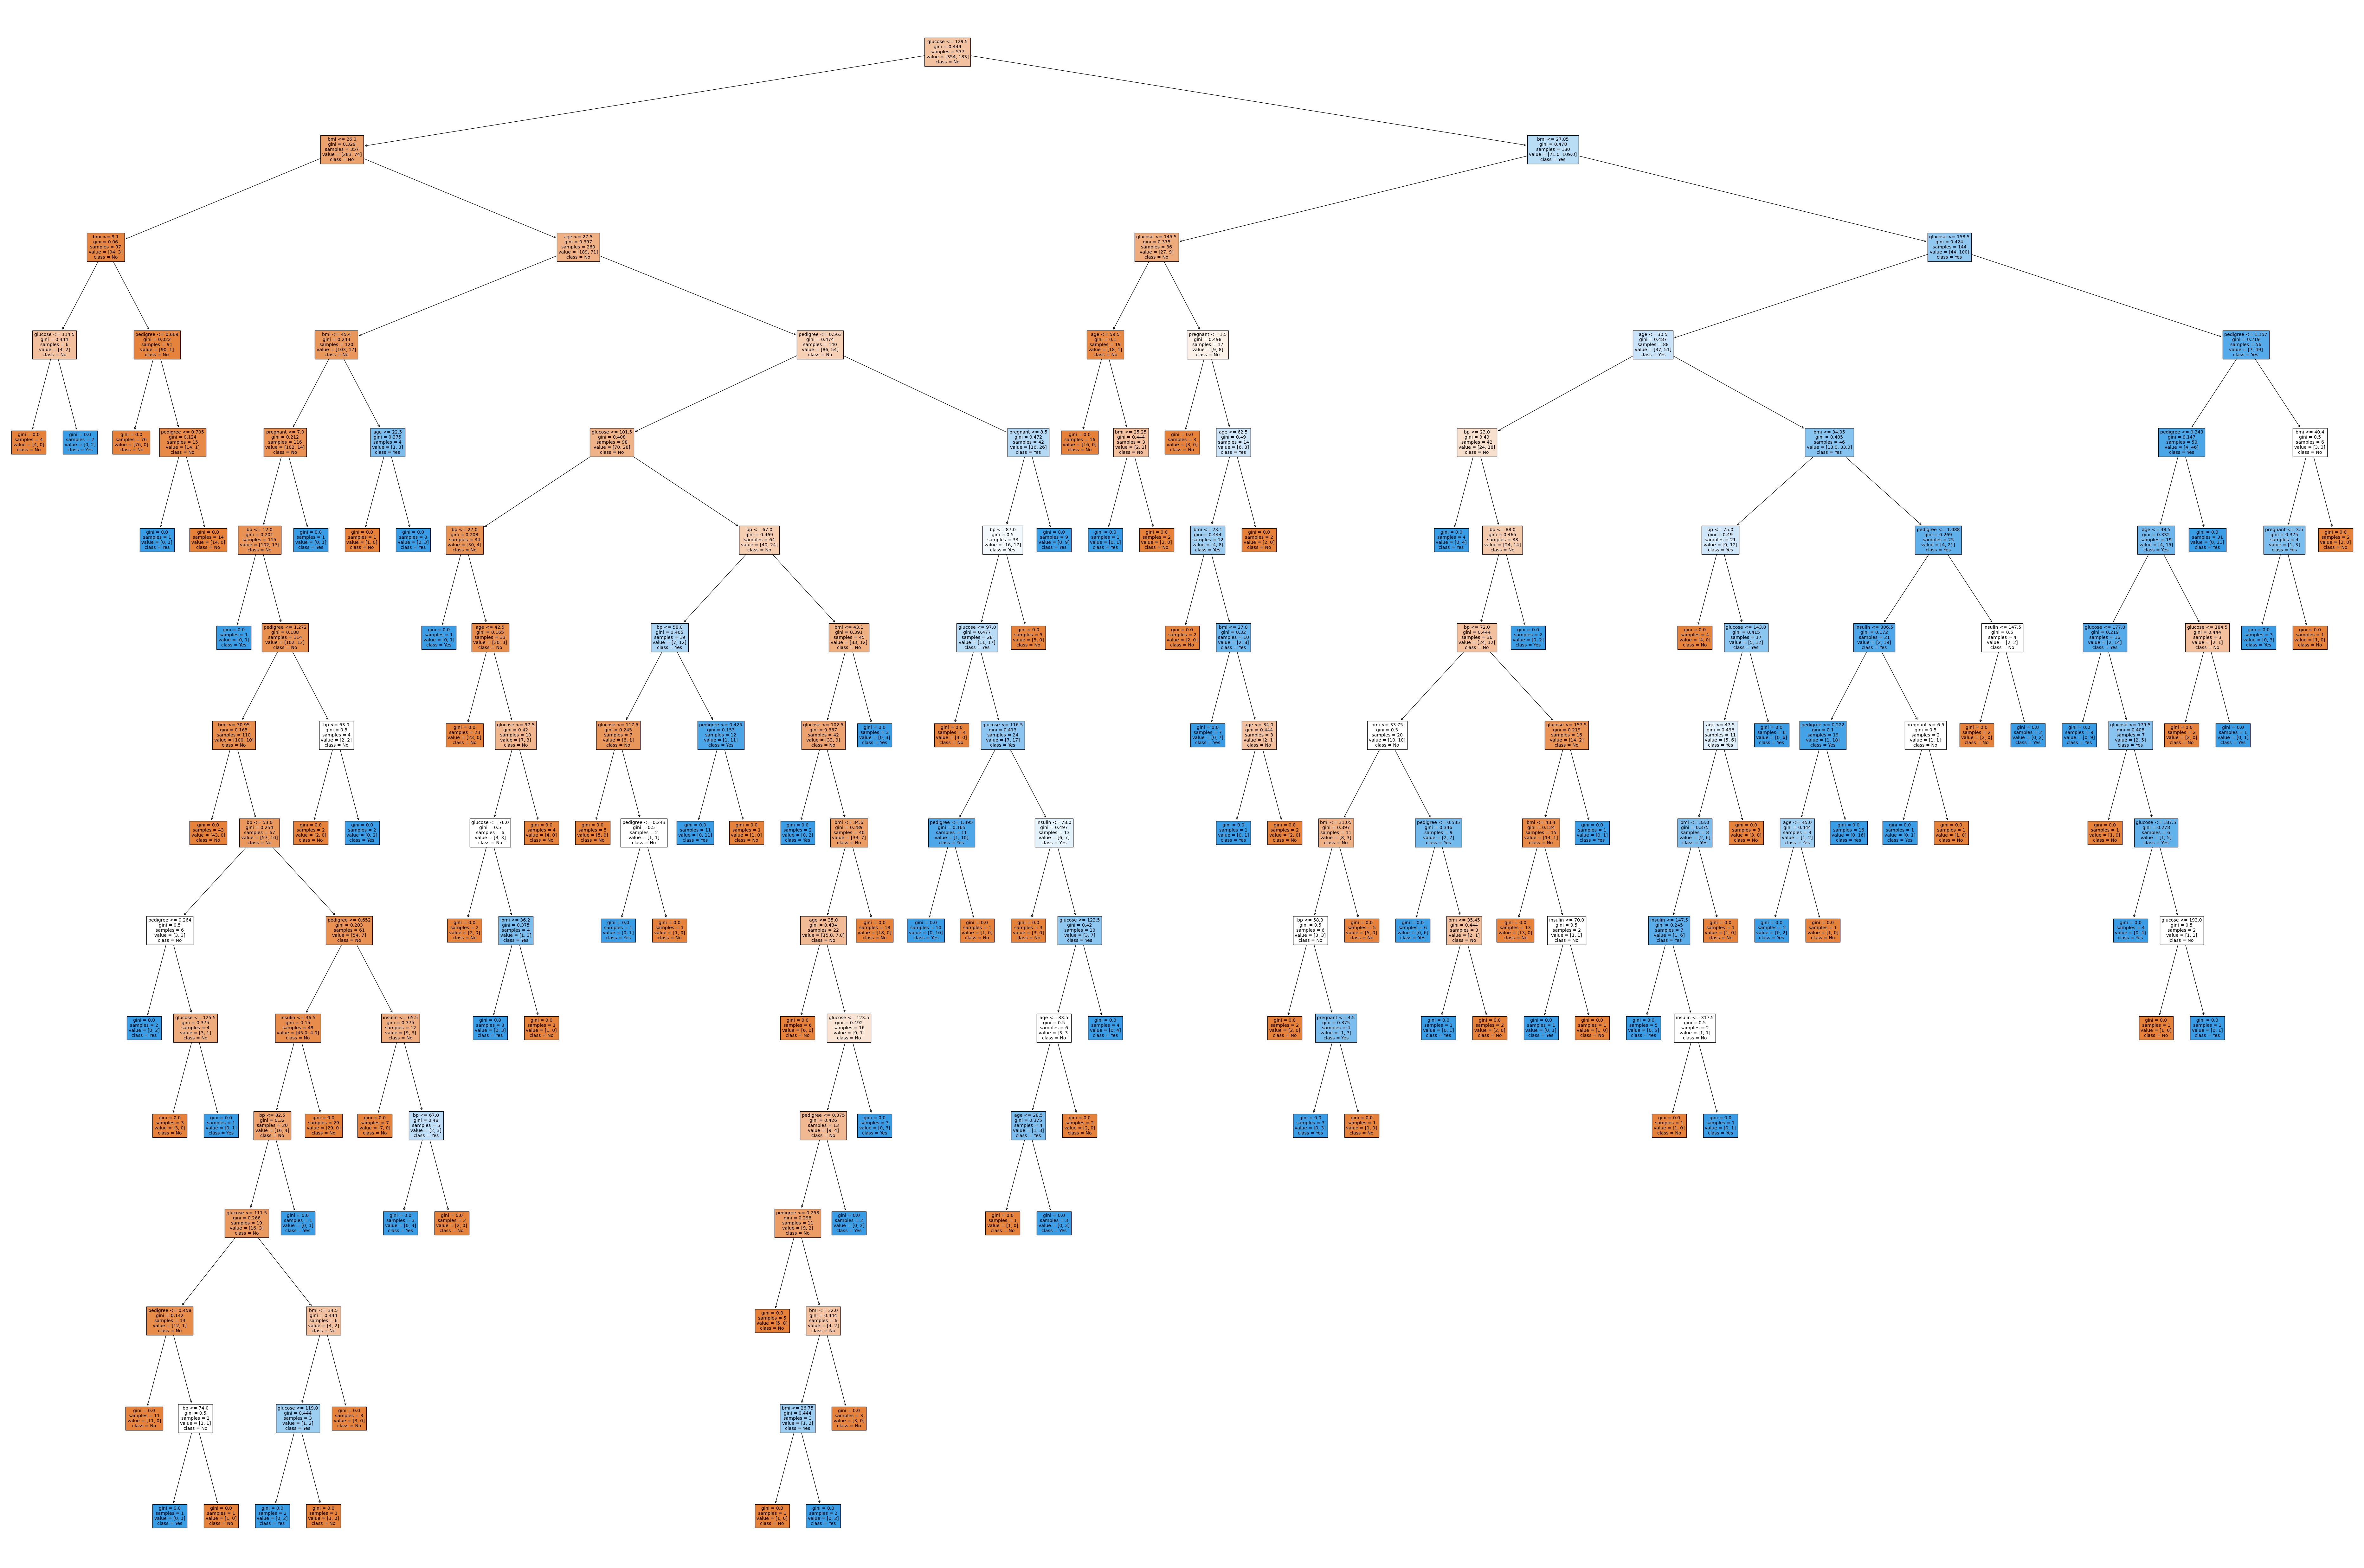

In [35]:
plt.figure(figsize=(96,64))
plot_tree(clf, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True)
plt.show()

#### Optimizing Decision Tree Performance

- **criterion:** optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- **splitter:** string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- **max_depth:** int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


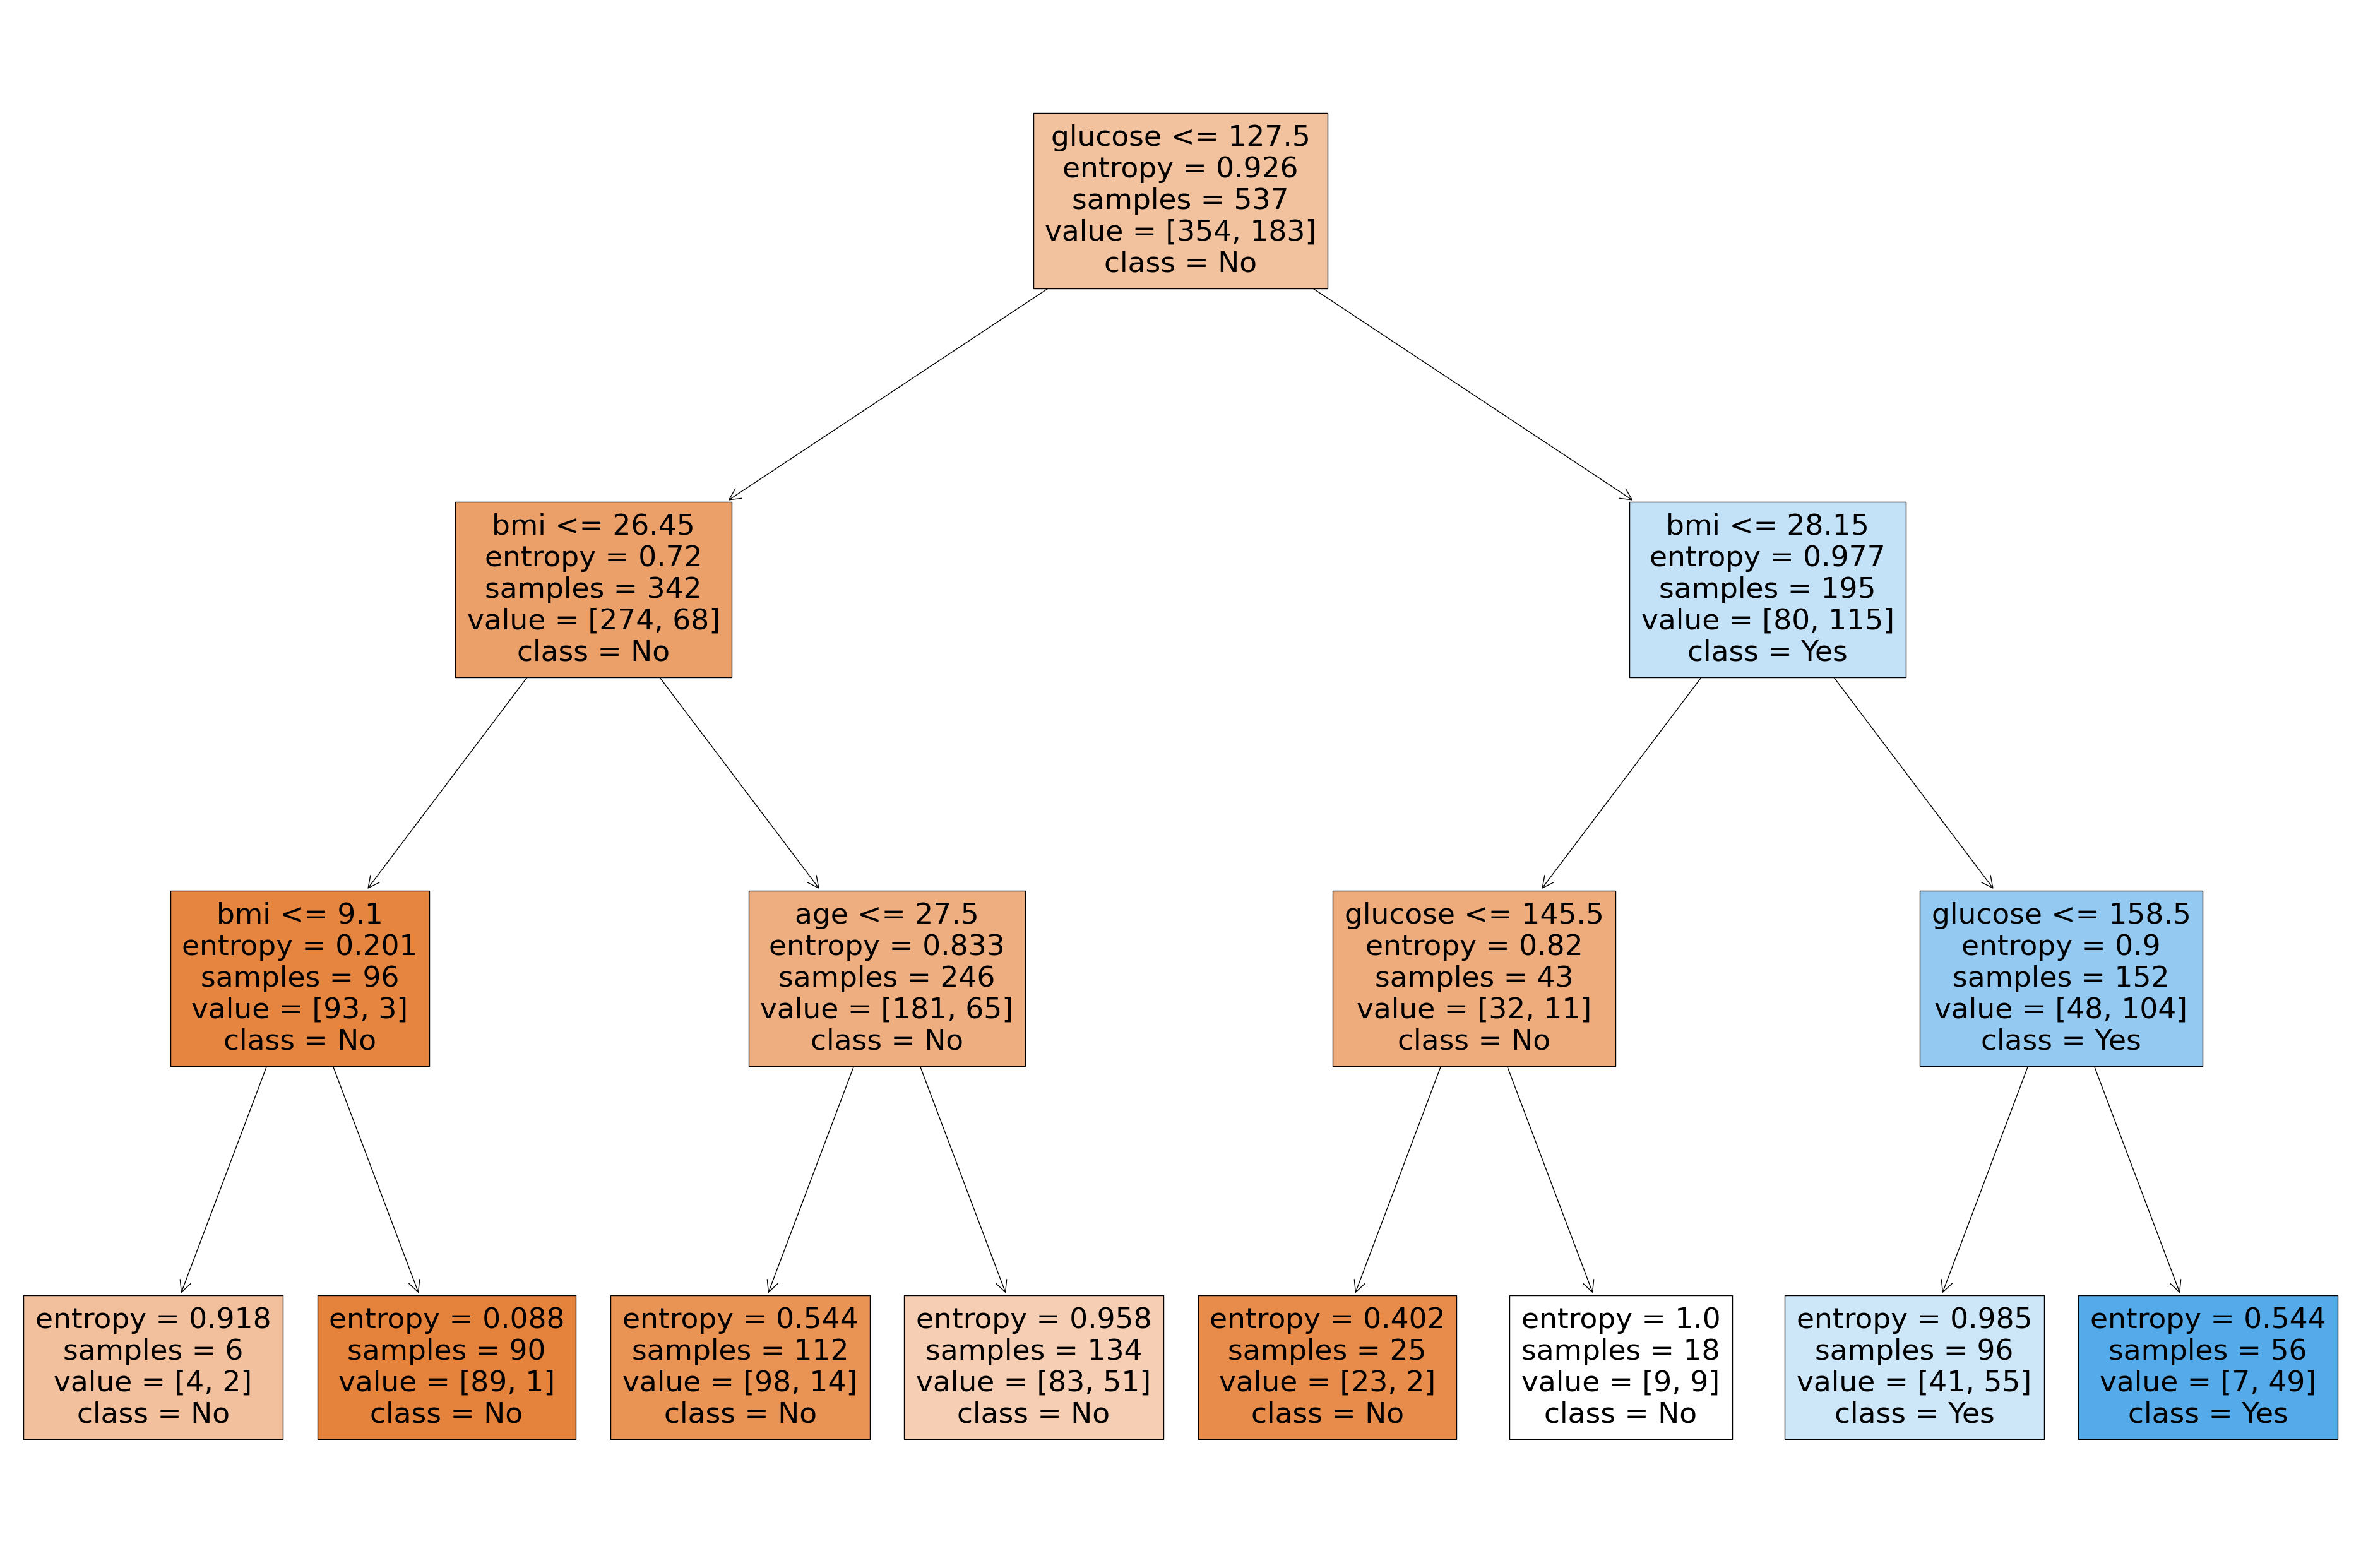

In [37]:
plt.figure(figsize=(48,32))
plot_tree(clf, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True)
plt.show()

### **Random forest**

- [https://www.datacamp.com/tutorial/random-forests-classifier-python](https://www.datacamp.com/tutorial/random-forests-classifier-python)
- [https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html](https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html)
- [https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_RandomForest.html](https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_RandomForest.html)